In [1]:
import functions
from functions import *
start()

# Analyse des données de Grip-force
## Objectif
L'objectif de cet exercice est de réaliser une pré-analyse et de créer les fonctions, qui, nous permettra d'analyser automatiquement les signaux une fois les mesures réalisées.
Les pré-analyses sont les suivantes :
- Ré-échantillonner les Mesures à 200 Hz.
- Appliquer un filtre Butterworth passe bas d'ordre 4, 15 Hz sans phase
- Montrer un marker sur un schéma
- Regrouper les mesures en Séries de mesures de -200 ms à +800 ms autour du marker.
- Si aucun Marker n'est présent, représenter les signaux sous forme de signaux d'une seconde.
- Déceler les pics : deux méthodes à appliquer :
    - Retirer tous les signaux qui sont supérieurs à 200 mN par rapport à la baseline
    - Retirer tous les signaux qui ont un changement soudain de 100 mN en moins de 100 ms

Ce qui peut être ajouté :
- Différencier la baseline de la mesure
- Retirer la baseline de la mesure.
- Réaliser la moyenne de la mesure (entre 500 ms et 800 ms)
- Réaliser éventuellement un t-test

## Présentation des signaux
Avant d'analyser nos données, nous avons réalisé des mesures de grip-force.
Ces mesures sont séparés en plusieurs parties :
- Des mesures de chute : On fait tomber le capteur sur une mousse,
- Des mesures de pics : On tapotte le capteur trois fois,
- Des mesures de maintiens : On maintient le capteur pendant quelques secondes,
- Une mesure marker : seul les markeurs sont visible dans la mesures,
- Une mesure de démonstration : une mesure où rien n'a été appliquée.

### Visualisation des signaux

Ici, nous allons visualiser les signaux.
A titre informatif, les valeurs seront inversées : plus la force de compression sera grande, plus la valeur observée sera grande (positive) et inversement, la force d'extension sera une valeur négative.

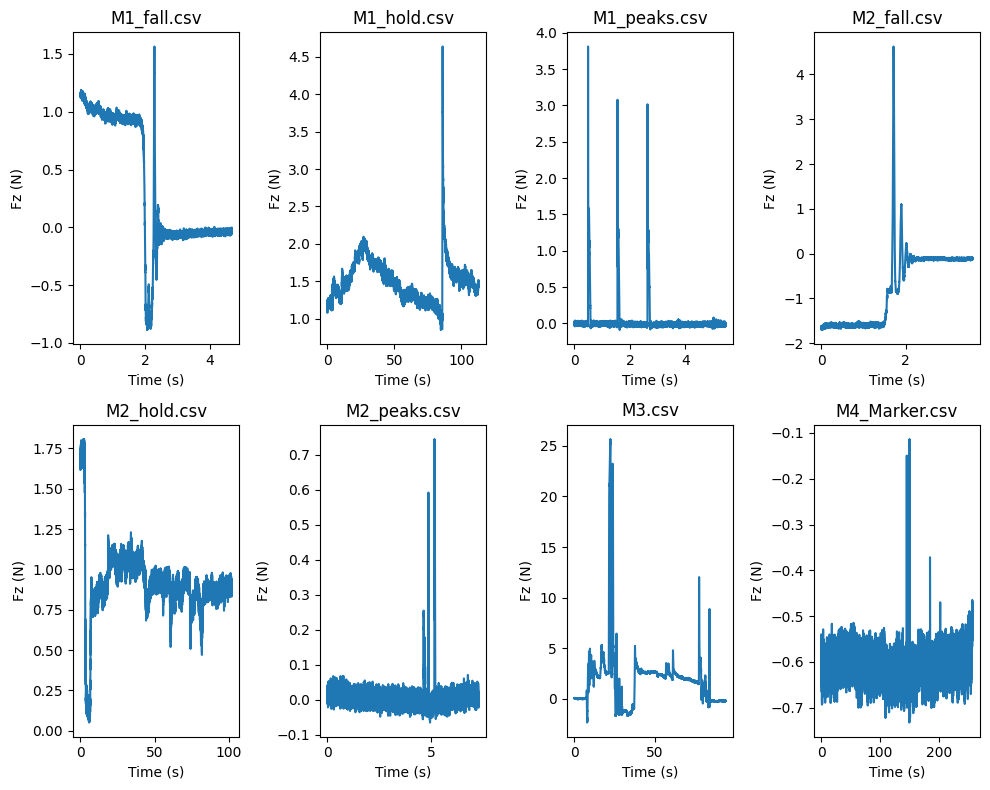

In [2]:
Show_Signal(COLUMNS[0], COLUMNS[1])

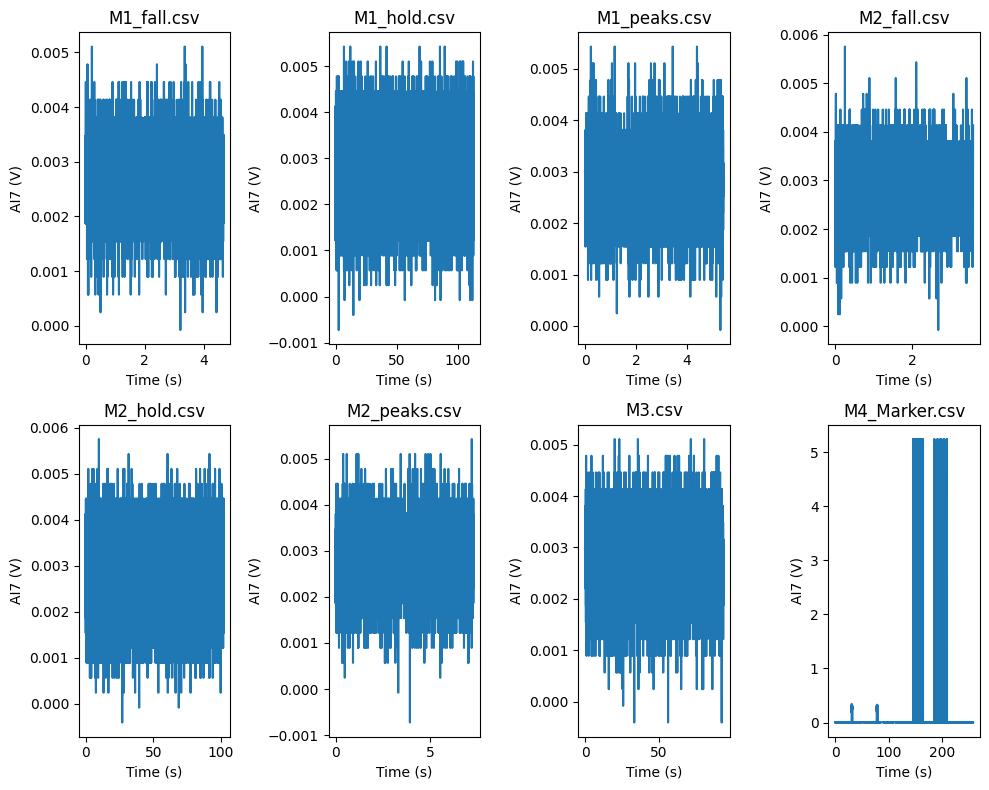

In [3]:
Show_Signal(x=COLUMNS[0], y=COLUMNS[2])

### Ré-échantillonnage
Chaque signal est indépendant. Ils ont étés réalisées avec différentes fréquences d'échantillonnages.
Nous allons donc rééchantillonner les signaux à 200 Hz, soit la fréquence qui sera utilisée durant les analyses.

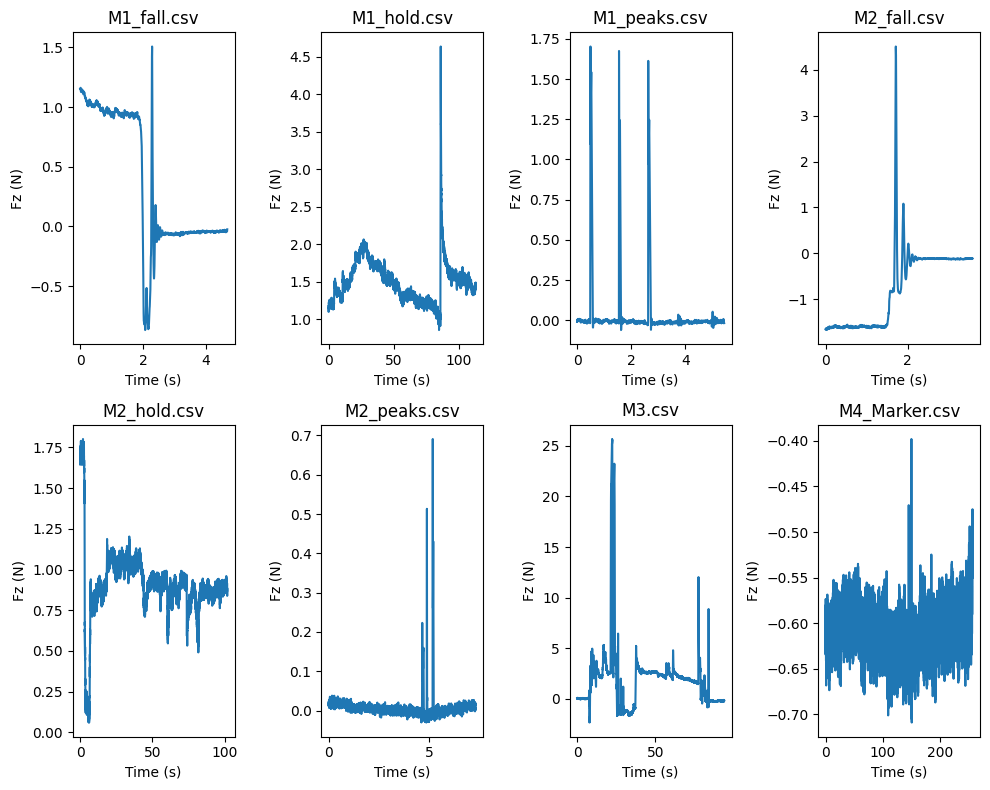

In [4]:
Resample_All_Signal(200)
Show_Signal(COLUMNS[0], COLUMNS[1])

### Filtre passe-bas
Maintenant que les signaux sont à la bonne fréquence, nous allons appliquer un filtre passe-bas de type Butterworth d'ordre 4 avec comme fréquence de coupure 15 Hz

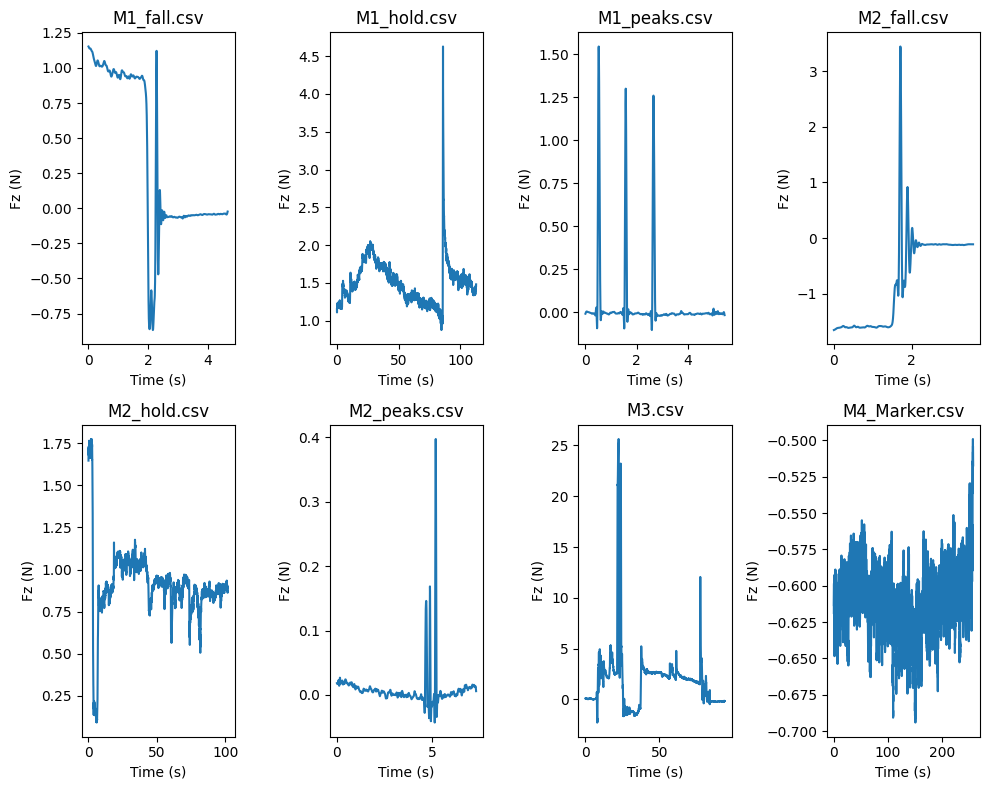

In [5]:
Filter_All_Signal()
Show_Signal(COLUMNS[0], COLUMNS[1])


### Repérage des Marker
Seul le signal 'test22.csv' contient des markeurs, nous allons l'utiliser pour retrouver les marker et créer une époch autour de ce marker.
Cette époch débutera à -200 ms avant le marker et +800 ms après, pour une epoch totale de 1 s

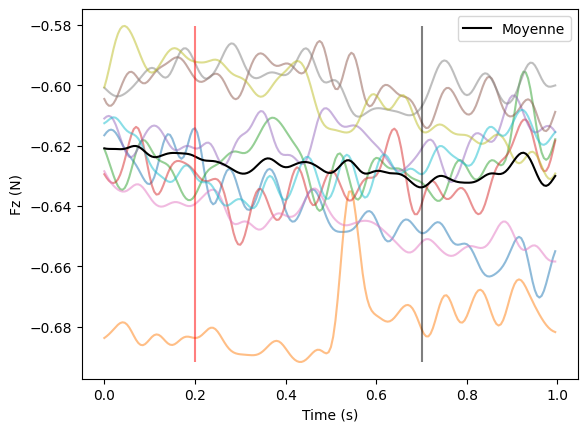

In [6]:
Show_Trigger(Search_Trigger())

### Création des Markers
Maintenant que nous avons décelé les Markers nous allons créer d'autres markers, cette fois-ci fictifs, pour obtenir de plus nombreuses mesures

335


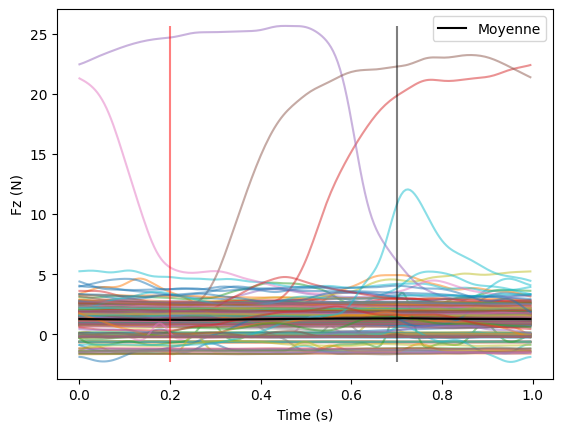

In [7]:
DF = Search_Trigger()   # Pour obtenir les trigger initiaux
DF = Create_Trigger(DF) # Pour obternir de faux triggers
print(len(DF.columns)-1)
Show_Trigger(DF)        # Pour plot les trigger


### Presentation des résultats
Ce qu'on a obtenu est une centaine de mesures. Nous voyons des mesures allant aux allentours de 0 N. Mais nous voyons aussi de nombreuses mesures en avec de trop grande variation.

Nous voyons aussi deux barres verticales. La première en rouge correspond à t = 0 ou au point trigger. Les 200 ms avant correspondent à la baseline.
Nous voyons aussi une barre verticale noire, qui correspond au début de la mesure. Tout ce qui se situe après sera comparée.

### Remise à 0 : Baseline.
Maintenant que nous avons toutes les mesures, nous allons retirer la baseline à toutes les mesures.

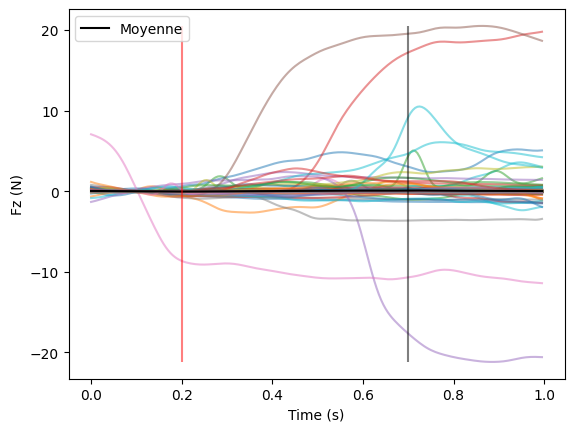

In [8]:
DF = Baseline(DF)       # Pour appliquer la baseline
Show_Trigger(DF)        # Pour plot les trigger

### Retirer les pics
Maintenant que nous avons appliqué une baseline unique sur toutes les mesures, nous allons appliquer le filtre des pics.
On applique ici deux filtres :
- Un filtre qui retire toutes les mesures qui s'éloignent de plus de 200 mN de la Baseline (filtre baseline),
- Un filtre qui retire toutes les mesures qui s'éloignent de plus de 100 mN en moins de 100 ms (filtre Max-Min).

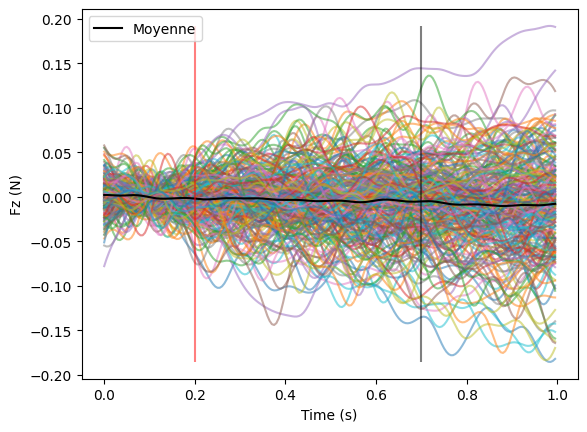

In [9]:
DF = Drop_Pics_BL(DF)           # Pour appliquer le filtre de 200ms à la baseline
DF = Drop_Pics_Min_Max(DF)      # Pour appliquer le filtre Max-Min
Show_Trigger(DF)                # Pour plot mesures

### Séparation des mesures

Une fois que les mesures ont été épurées des grandes variations il nous faudra faire quelques étapes supplémentaires :
- Exclure les participants dont plus de 20% des mesures de la condition ont été retirés
- Regrouper les mesures par conditions

Ces fonctions n'ont pas été effectuées dans le cadre de cette pré-analyse mais seront implémentées dans l'analyse complète.
Pour le moment, nous allons séparer les mesures en deux parties.
La moyenne des deux parties seront représentées dans un plot.
Et nous allons effectuer un t-test pour comparer les deux mesures.

Ce t-test n'aura aucun impact dans cette analyse. Il servira juste d'exemple pour l'analyse complète qui arrivera plus tard.

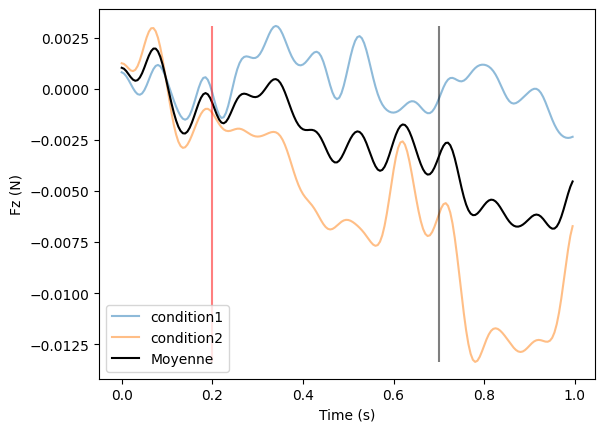

In [10]:
(SeparatedData, group1, group2) = RandomSeparateMeasures(DF)      # Sépare les données
Show_Trigger(SeparatedData)                     # Pour plot mesures

### Comparer les deux mesures

Maintenant que nous avons deux groupes de mesures que nous avons moyennées, nous pouvons faire un t-test sur les deux mesures entre 500 et 800 ms après le marker.

In [11]:
from pingouin import ttest
df = pd.DataFrame()
df['condition1'] = DF.loc[range(140,200),group1].mean().reset_index(drop=True)
df['condition2'] = DF.loc[range(140,200),group2].mean().reset_index(drop=True)
ttest(df['condition1'] , df['condition2'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.596269,98,two-sided,0.113649,"[-0.0, 0.02]",0.23507,0.378,0.639082


### Conclusion
Nous voyons que la mesures a une p-value de 0.11 ce qui est bien supérieur à 0.05.
Pour rappel, ces mesures sont factices et n'avaient pour but que de manipuler les variables.
Aucune conclusion ne peut être apportée, si ce n'est que les variables ont pu être manipulée.